In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("house_prices_dataset.csv")

In [3]:
dataset.head(3)

,Area,Bedrooms,Bathrooms,Location_Score,Age,Price
0,850,2,1,6,10,5200000
1,900,2,1,7,8,5500000
2,1100,3,2,8,5,7200000


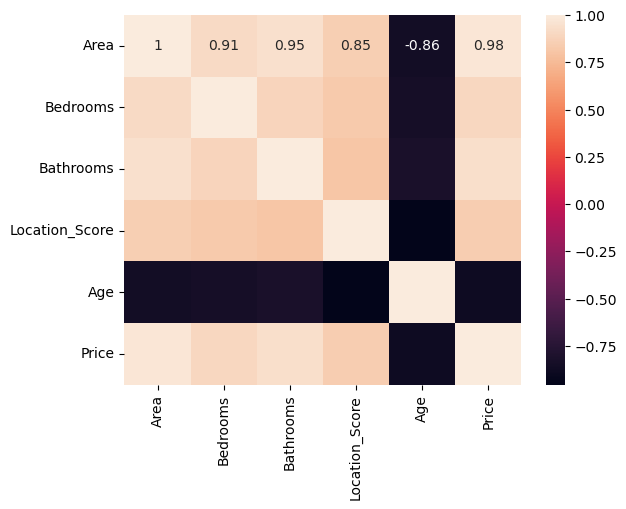

In [4]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [5]:
x = dataset.iloc[:,:-1]
y = dataset["Price"]

In [6]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge 

In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

# LinearRegression

In [11]:
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
lr.score(x_test,y_test)*100

94.03772069482616

In [13]:
lr.coef_

array([3318264.40130862, -323268.50050837,  845128.46750441,
       -290829.05432697, -794637.07214075])

In [14]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

2828058131426.5815
1510806.695600285
1681683.124559018


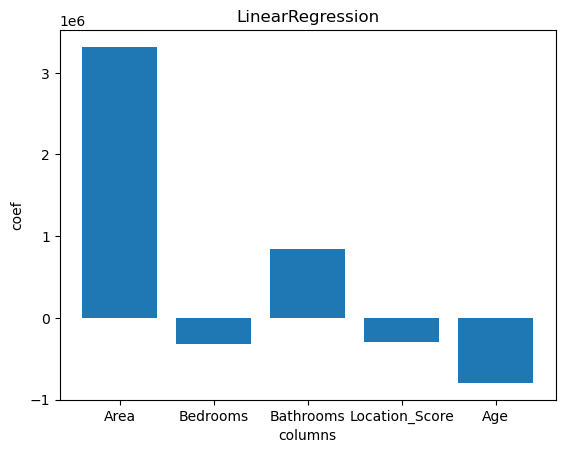

In [15]:
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# Lasso

In [17]:
la = Lasso(alpha=0.01)
la.fit(x_train,y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [18]:
la.score(x_test,y_test)*100

94.03772038356564

In [19]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

2828058279065.226
1510806.7401227758
1681683.1684551125


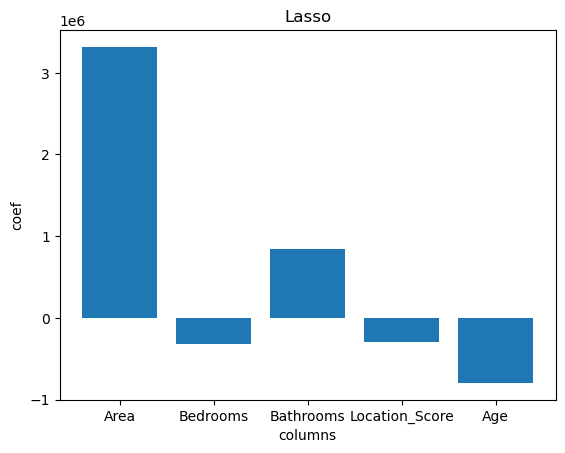

In [20]:
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# Ridge

In [22]:
ri = Ridge(alpha = 10)
ri.fit(x_train,y_train)

,alpha,10
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [23]:
ri.score(x_test,y_test)*100

86.72460538758715

In [24]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

6296851549532.724
1751902.6486082054
2509352.8148773187


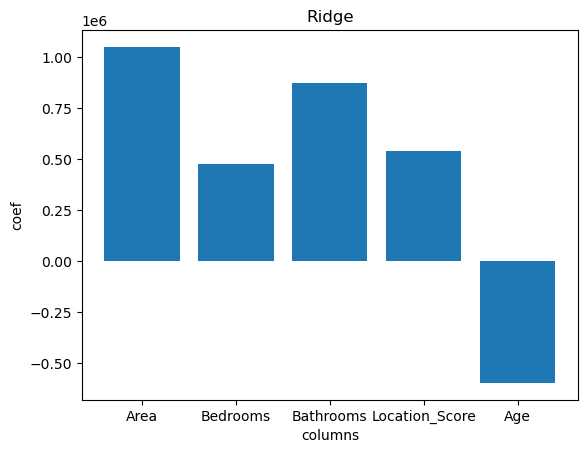

In [25]:
plt.bar(x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [26]:
df = pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})

In [27]:
df

,col_name,LinearRegression,Lasso,Ridge
0,Area,3.318264e+06,3.318264e+06,1.050445e+06
1,Bedrooms,-3.232685e+05,-3.232684e+05,4.748016e+05
2,Bathrooms,8.451285e+05,8.451285e+05,8.708292e+05
3,Location_Score,-2.908291e+05,-2.908289e+05,5.423043e+05
4,Age,-7.946371e+05,-7.946369e+05,-5.946726e+05
